In [1]:
#Imporiting Important libray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data={'age':[22,25,47,52,46,56,55,60,62,61,18,28,27,29,49],
     'have_insurance':[0,0,1,0,1,1,0,1,1,1,0,0,0,0,1]}

In [3]:
df=pd.DataFrame(data)

In [49]:
df

,age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [4]:
df.shape

(15, 2)

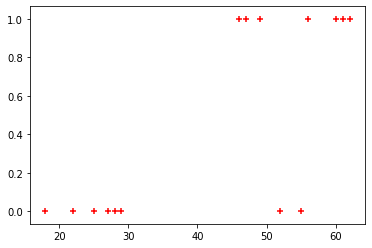

In [5]:
plt.scatter(df.age,df['have_insurance'] ,marker="+",color='red')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df['have_insurance'],train_size=0.7)

In [8]:
x1=X_test.values
x1

array([[25],
       [29],
       [61],
       [28],
       [62]], dtype=int64)

In [9]:
X_test1=pd.DataFrame(x1)
X_test1.columns=['Age']

In [15]:
#X_test1=pd.concat([predicteded_df,p1,p2])
X_test1

,Age,predicteded
0,25,0
1,29,0
2,61,1
3,28,0
4,62,1


In [11]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [12]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#prediction
y_predicted=LR.predict(X_test)

In [19]:
X_test1['predicteded']=pd.DataFrame(y_predicted)
 

In [20]:
y_predicted

array([0, 0, 1, 0, 1], dtype=int64)

In [21]:
#probability prediction
predict_proba=LR.predict_proba(X_test)

In [22]:
predict_proba

array([[0.90597421, 0.09402579],
       [0.85953879, 0.14046121],
       [0.13939158, 0.86060842],
       [0.87269039, 0.12730961],
       [0.12632541, 0.87367459]])

In [29]:
#Probability of 0
proba_0=predict_proba[:,:1]

In [30]:
#adding 'proba_0' to X_test1 dataframe
X_test1['proba_0']=pd.DataFrame(proba_0)
 

In [31]:
#Probability of 1
proba_1=predict_proba[:,1:]

In [32]:
proba_1

array([[0.09402579],
       [0.14046121],
       [0.86060842],
       [0.12730961],
       [0.87367459]])

In [33]:

X_test1['proba_1']=pd.DataFrame(proba_1)
 

In [34]:
X_test1

,Age,predicteded,proba_0,proba_1
0,25,0,0.905974,0.094026
1,29,0,0.859539,0.140461
2,61,1,0.139392,0.860608
3,28,0,0.872690,0.127310
4,62,1,0.126325,0.873675


In [35]:
#Accuracy of our model
LR.score(X_test,y_test)

1.0

In [40]:
#Lets predict the age of 45 will take_inusurance
LR.predict([[45]])

array([1], dtype=int64)

### Lets use math to predict the value

#### model.coef_ indicates value of m in y=m*x + b equation

In [41]:
LR.coef_

array([[0.11349429]])

#### model.intercept_ indicates value of b in y=m*x + b equation

In [42]:
LR.intercept_

array([-5.10279885])

#### Lets defined sigmoid function now and do the math with hand

In [43]:
import math
def sigmoid(x):
    return 1/(1+ math.exp(-x))

In [44]:
def prediction_function(age):
    z=0.113*age-5.10
    y=sigmoid(z)
    return y

In [48]:
prediction_function(35)

0.24140353812106505

#### If prediction_function return value is less tha 0.5 then its '0'  else '1'